In [55]:
import numpy as np
import math
import random
import matplotlib as plt
from tqdm import tqdm
import matplotlib.pyplot as plt
from itertools import product


p_a=np.array([2.52785735e-05, 8.24594082e-05, 7.88165795e-02, 1.13364521e-01,
          1.07589179e-03, 2.47784902e-05, 4.22018539e-04, 1.44224327e-01,
          2.40682230e-03, 1.25660849e-01, 1.59677046e-04, 1.29932055e-01,
          6.67789081e-03, 6.25392640e-03, 7.58624760e-02, 6.79967190e-02,
          1.34283393e-01, 1.09287327e-01, 1.17454630e-03, 2.26798775e-03,
          4.76190476e-07])

p_b=np.array([6.40741566e-05, 5.47838997e-02, 8.18082175e-02, 8.71095741e-02,
           2.96795363e-02, 6.40741566e-05, 4.02676401e-02, 3.85576510e-02,
           3.16738602e-02, 3.87499120e-02, 2.63203107e-02, 7.50599981e-02,
           5.88936013e-02, 5.19248129e-02, 1.18077702e-01, 6.01478782e-02,
           3.22321380e-02, 1.01703869e-01, 3.11954854e-02, 4.16216910e-02,
           6.40741566e-05])




def gen_profile(n, s):
    permutations = list(product(np.arange(s + 1), repeat=n))
    profile = [i for i in permutations if np.sum(i) == s]
    return np.array(profile)
profile = gen_profile(3,5)



def game(n,s,iterations):
    utility_a=[0]
    utility_b=[0]

    
    current_move_a=random.choice(range(len(profile)))
    current_move_b=random.choice(range(len(profile)))
    
    freq_a=np.zeros(len(profile))
    freq_b=np.zeros(len(profile))
    for time in range(iterations):
        
        utility_a.append(utility_a[-1]+util(current_move_a,current_move_b))
        utility_b.append(utility_b[-1]+util(current_move_b,current_move_a))
        
        current_move_a=get_action(current_move_a,current_move_b,p_a)
        current_move_b=get_action(current_move_b,current_move_a,p_b)
        
        
        freq_a[current_move_a]+=1
        freq_b[current_move_b]+=1
    
    return utility_a,utility_b
    

In [56]:
def util(strat_me,strat_opp):
    return sum(np.sign(profile[strat_me]-profile[strat_opp]))


In [45]:
def get_action(strat_me,strat_opp,p):
    distribution=np.cumsum(p)
    
    r=random.uniform(0,1)
    if r>=0 and r<distribution[0]:
        return 0
    for i in range(len(distribution)-1):
        if r>=distribution[i] and r<distribution[i+1]:
            return i+1


In [57]:
G=10

U=[]
for i in tqdm(range(G)):
    U.append(game(3,5,10000))


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]


(10001, 2)


Text(0.5, 1.0, 'utility comparison RM vs RL')

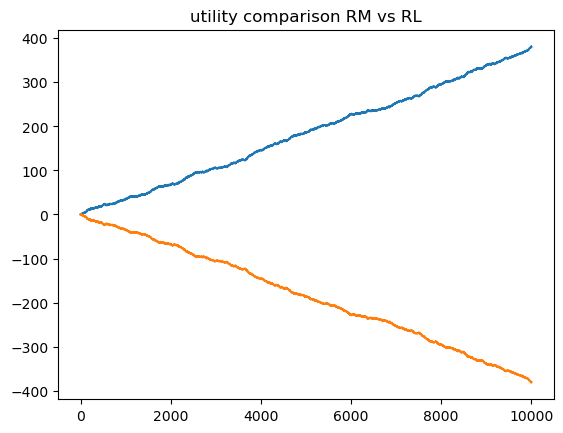

In [63]:
U=np.array(U)
U_time=np.average(U.T,axis=2)

print(np.shape(U_time))
plt.plot((U_time))
plt.title('utility comparison RM vs RL')



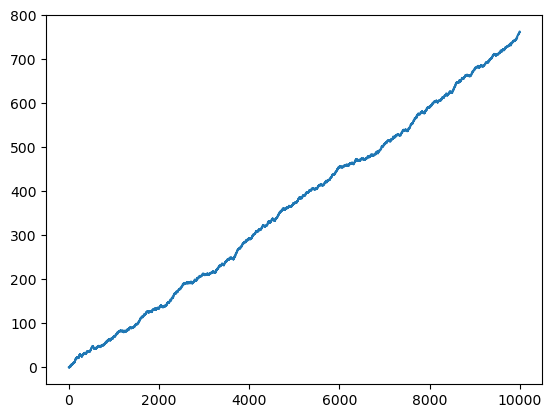

In [59]:
diff=[U_time[x][0]-U_time[x][1] for x in range (10000)]
plt.plot(diff)


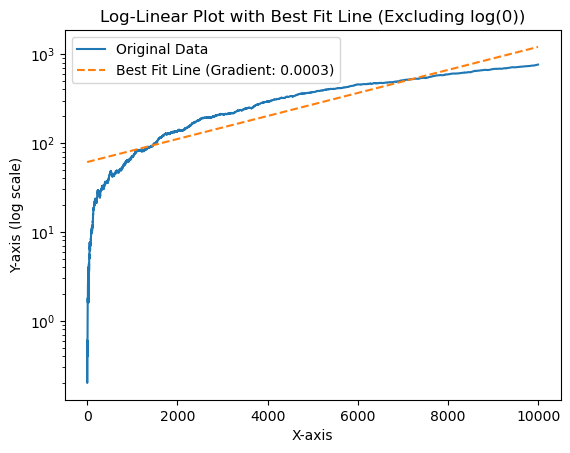

0.00029837644458410845


In [60]:
data =diff 

data = np.array(data)


# Exclude zero values from the data
non_zero_indices = data > 0
data = data[non_zero_indices]

# Generate x values based on the number of non-zero data points
x = np.linspace(1, len(data), len(data))

# Take the logarithm of the data
log_data = np.log(data)

# Create a linear regression model
slope, intercept = np.polyfit(x, log_data, 1)

# Generate the best-fitting line
best_fit_line = slope * x + intercept

# Create a log-linear plot
plt.semilogy(x, data, label='Original Data')
plt.semilogy(x, np.exp(best_fit_line), label=f'Best Fit Line (Gradient: {slope:.4f})', linestyle='--')

# Customize the plot if needed
plt.title('Log-Linear Plot with Best Fit Line (Excluding log(0))')
plt.xlabel('X-axis')
plt.ylabel('Y-axis (log scale)')
plt.legend()

# Show the plot
plt.show()
print(slope)

Gradient of the best-fit line: 0.9645921980862348


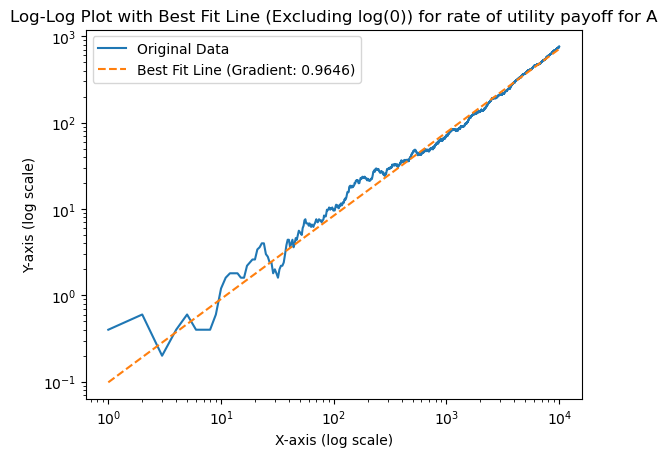

In [62]:
# Assuming 'data' is your array of data points
data=diff
data = np.array(data)

# Exclude zero values from the data
non_zero_indices = data > 0
data = data[non_zero_indices]

# Generate x values based on the number of non-zero data points
x = np.linspace(1, len(data), len(data))

# Take the logarithm of both x and y data
log_x = np.log(x)
log_data = np.log(data)

# Create a linear regression model in log-log space
slope, intercept = np.polyfit(log_x, log_data, 1)

# Generate the best-fitting line
best_fit_line = slope * log_x + intercept

# Display the gradient
print(f'Gradient of the best-fit line: {slope}')

# Create a log-log plot
plt.loglog(x, data, label='Original Data')
plt.loglog(np.exp(log_x), np.exp(best_fit_line), label=f'Best Fit Line (Gradient: {slope:.4f})', linestyle='--')

# Customize the plot if needed
plt.title('Log-Log Plot with Best Fit Line (Excluding log(0)) for rate of utility payoff for A')
plt.xlabel('X-axis (log scale)')
plt.ylabel('Y-axis (log scale)')
plt.legend()

# Show the plot
plt.show()